# EDA

### Import liberaries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns' ,None)
sns.set_style('darkgrid')

### Load the data in dataframe

In [2]:
df = pd.read_csv('Mobile_data.csv',header=0)
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


### Check shape ,info and descriptive stats od the data

In [3]:
print(df.shape)
print(f'dataset have {df.shape[0]} instances and {df.shape[1]} features.')

(2000, 15)
dataset have 2000 instances and 15 features.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [5]:
print(f'there are fetures with {df.dtypes.nunique()} differrent dtypes : {set(df.dtypes.values)}')

there are fetures with 2 differrent dtypes : {dtype('float64'), dtype('int64')}


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


1. minimum value for features 'fc' ie front camera megapixel , 'pc' i.e primary camera megapixel ,'px_heght' i.e pixel resolution height and 'sc_w' i.e screen width is given 0 . this seems to be an input error 

### Data cleaning

#### 1.Check if there is any incorrect information provided in the features.

In [7]:
for i in df.columns.values:
    print(i)
    print(df[i].unique())
    print()

battery_power
[ 842 1021  563 ... 1139 1467  858]

clock_speed
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

fc
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

int_memory
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

mobile_wt
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 170 161 193 169 120 149 186 122 167]

n_core

All information seems to be correctly provided.

#### 2.Replace np.nan inplace of not applicable values

In [8]:
for i in ['fc' , 'pc' , 'px_height' , 'sc_w'] :
    df[i] = df[i].replace(0, np.nan)

#### 3.Check for null values 

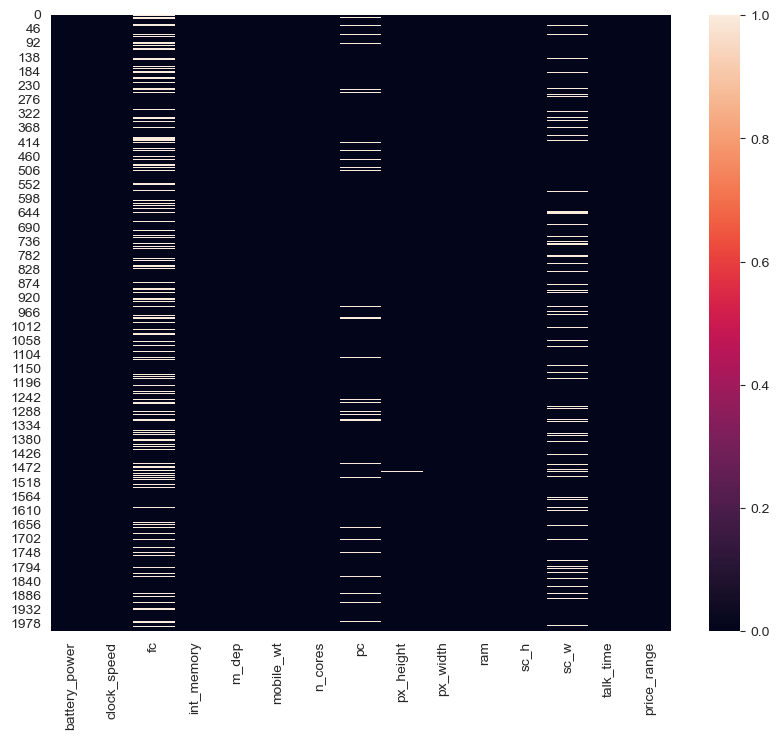

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data = df.isnull())
plt.show()

In [10]:
temp=pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0])
temp.reset_index(drop=False,inplace=True)
temp.columns =['features','null values']

temp['%null values'] = np.round(temp['null values']/len(df)*100,4)
temp

,features,null values,%null values
0,fc,474,23.70
1,pc,101,5.05
2,px_height,2,0.10
3,sc_w,180,9.00


there are less than 50% of missing values in the features ..so we will fill them.

#### 4.Check for Logical outliers

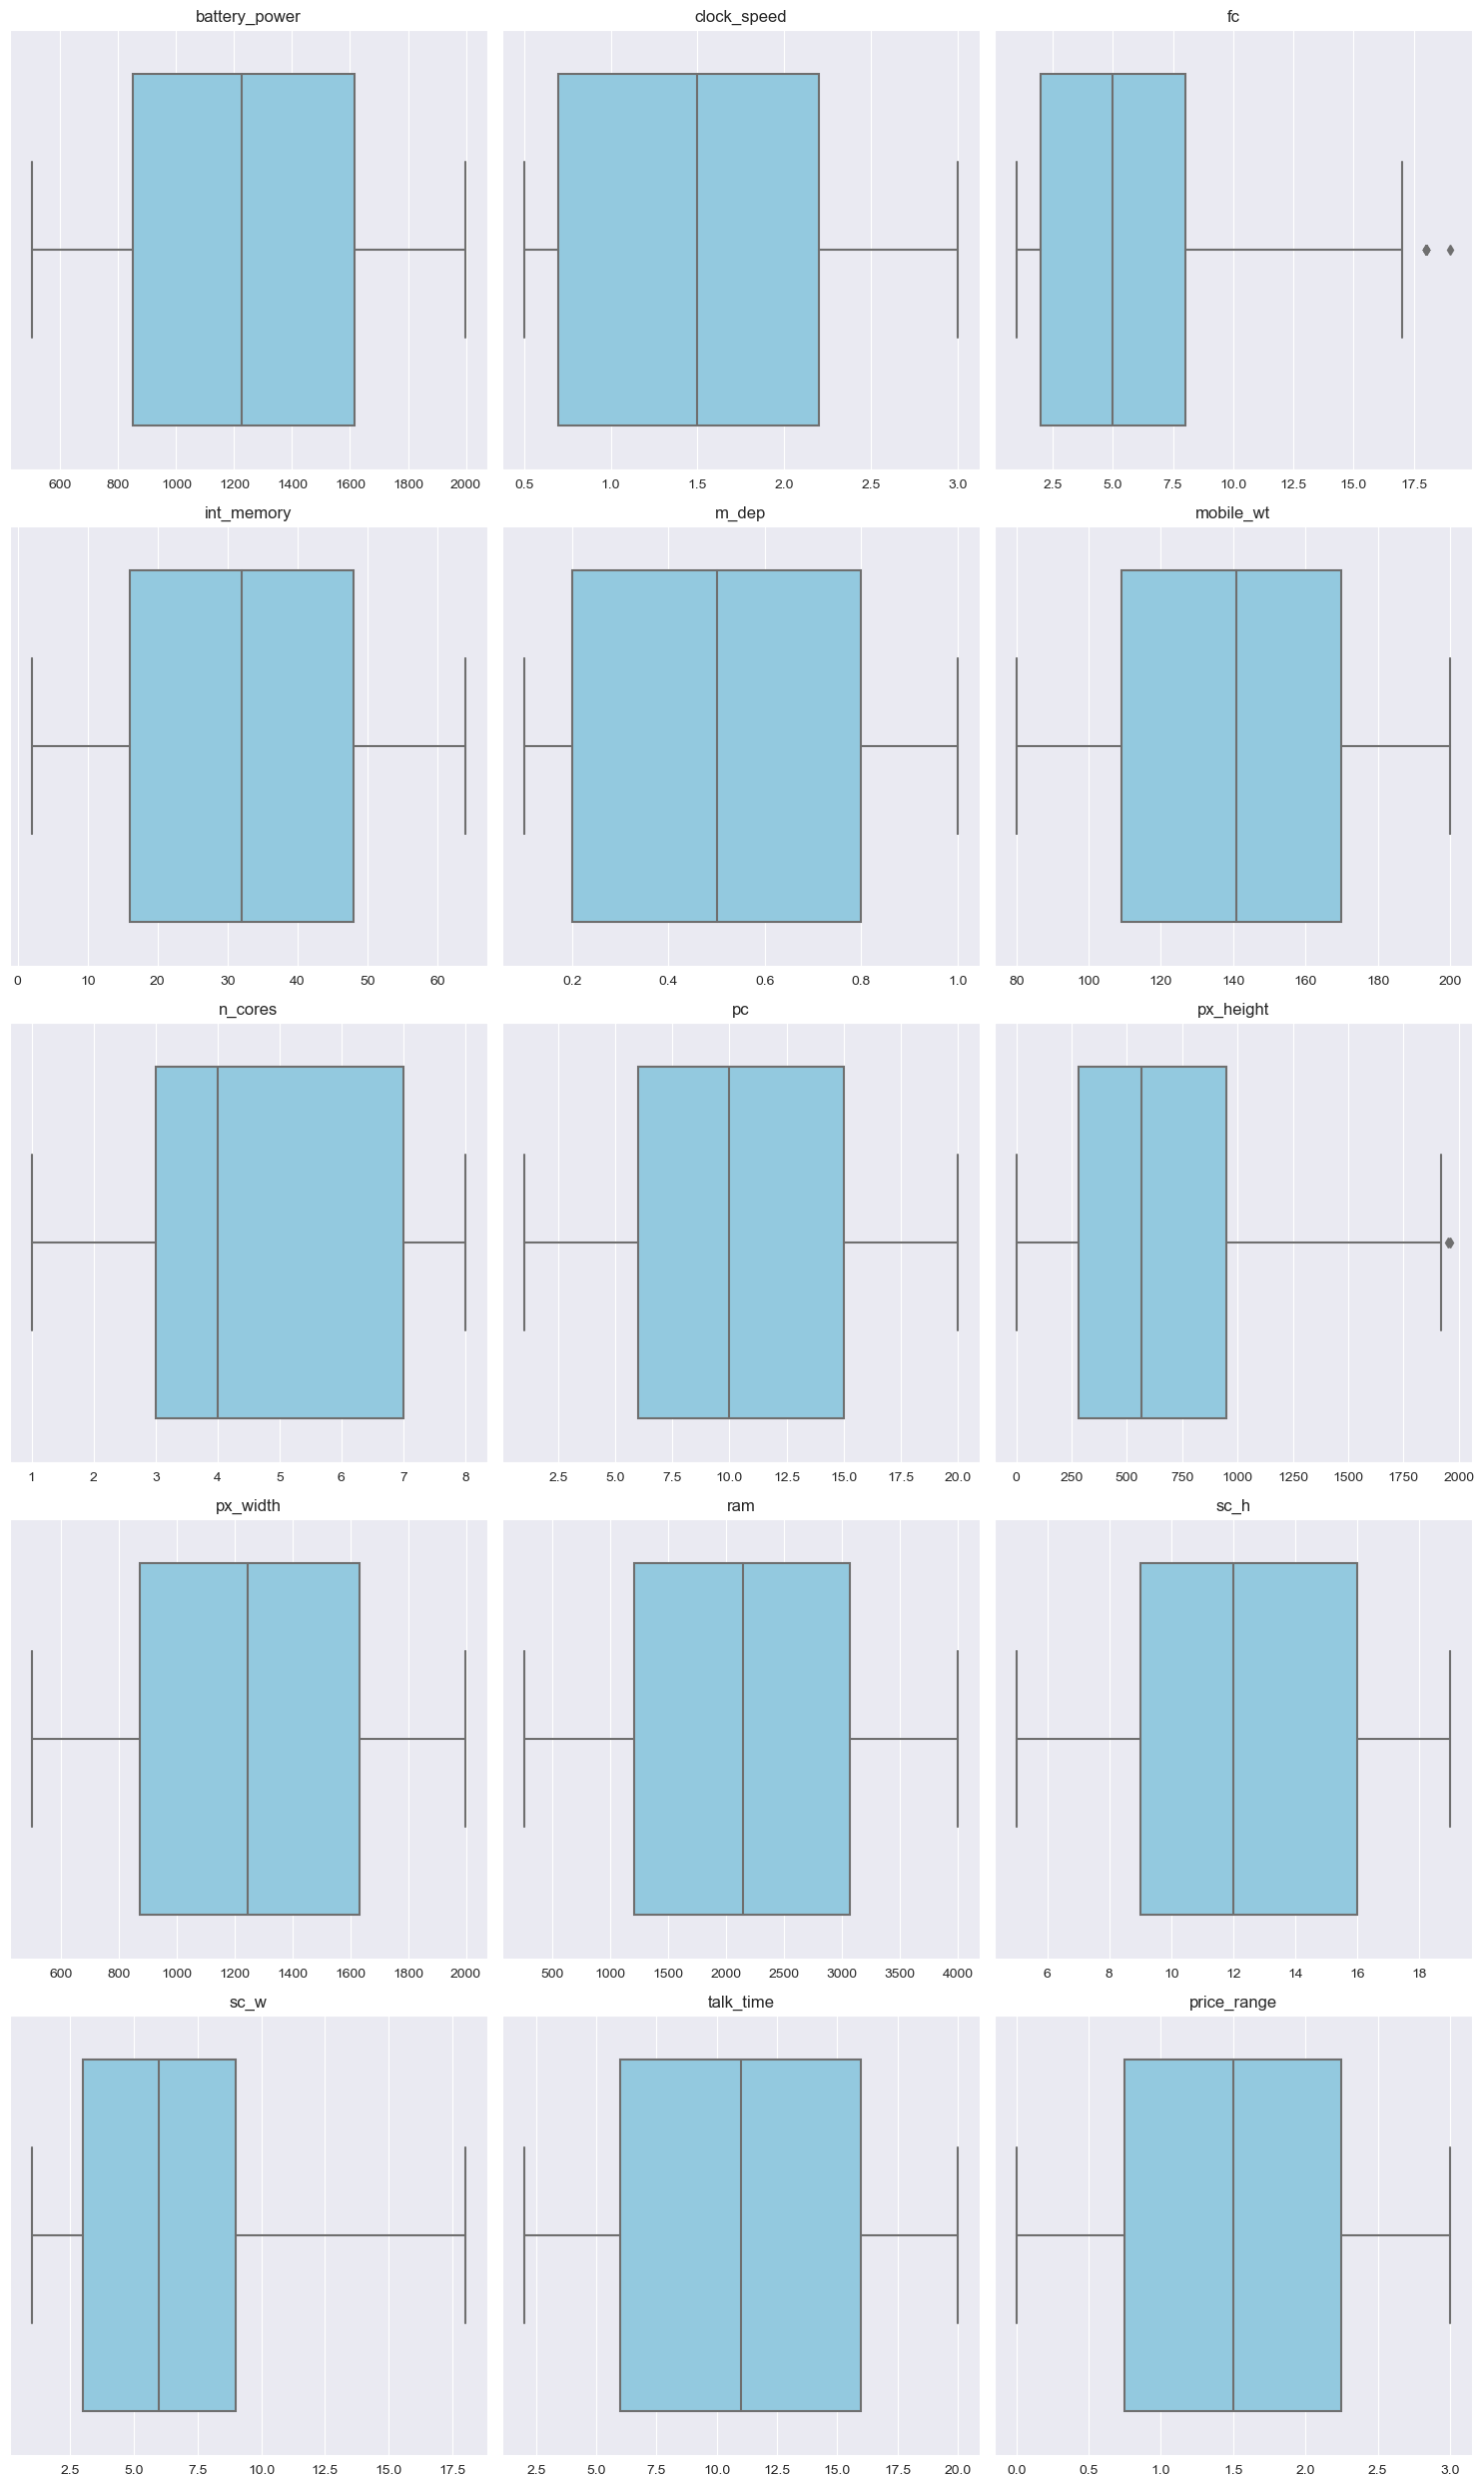

In [11]:
# Determine the number of columns in the DataFrame
num_columns = len(df.columns.values)

# Calculate the number of rows required for subplots
num_rows = (num_columns + 2) // 3  # Add 2 to handle uneven number of columns

# Set up the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(df.columns.values):
    sns.boxplot(ax=axes[i], data=df, x = column, color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove empty subplots if present
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


there are outliers in features 'fc' and 'px_height' but ther are no logical outliers in teh dataset.

#### 5.Check for dupicate data

In [12]:
df.duplicated().sum()

0

there are no dupicated data in the dataset

#### 6.Impute the missing values

In [13]:
for i in df.columns:
    df[i].fillna(value = df[i].median(), inplace = True)
    
print(f'there are {df.isnull().sum().sum()} missing values in the dataset')

there are 0 missing values in the dataset


7.Correlation matrix

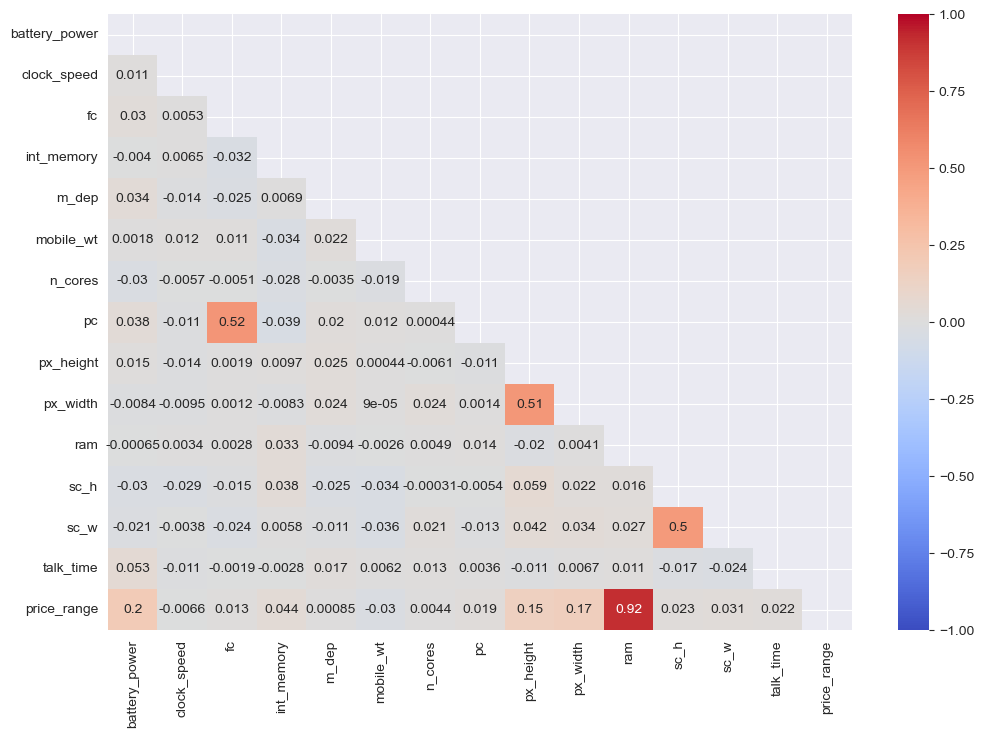

In [14]:
plt.figure(figsize=(12,8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data = corr , annot =True , vmin =-1 ,vmax=1,cmap ='coolwarm' ,mask =mask )
plt.show()

'pc' and 'fc' are moderately correlated while ram and price range are highly correlated. and there is no correlation in any other features with each other.

### Univarate analysis

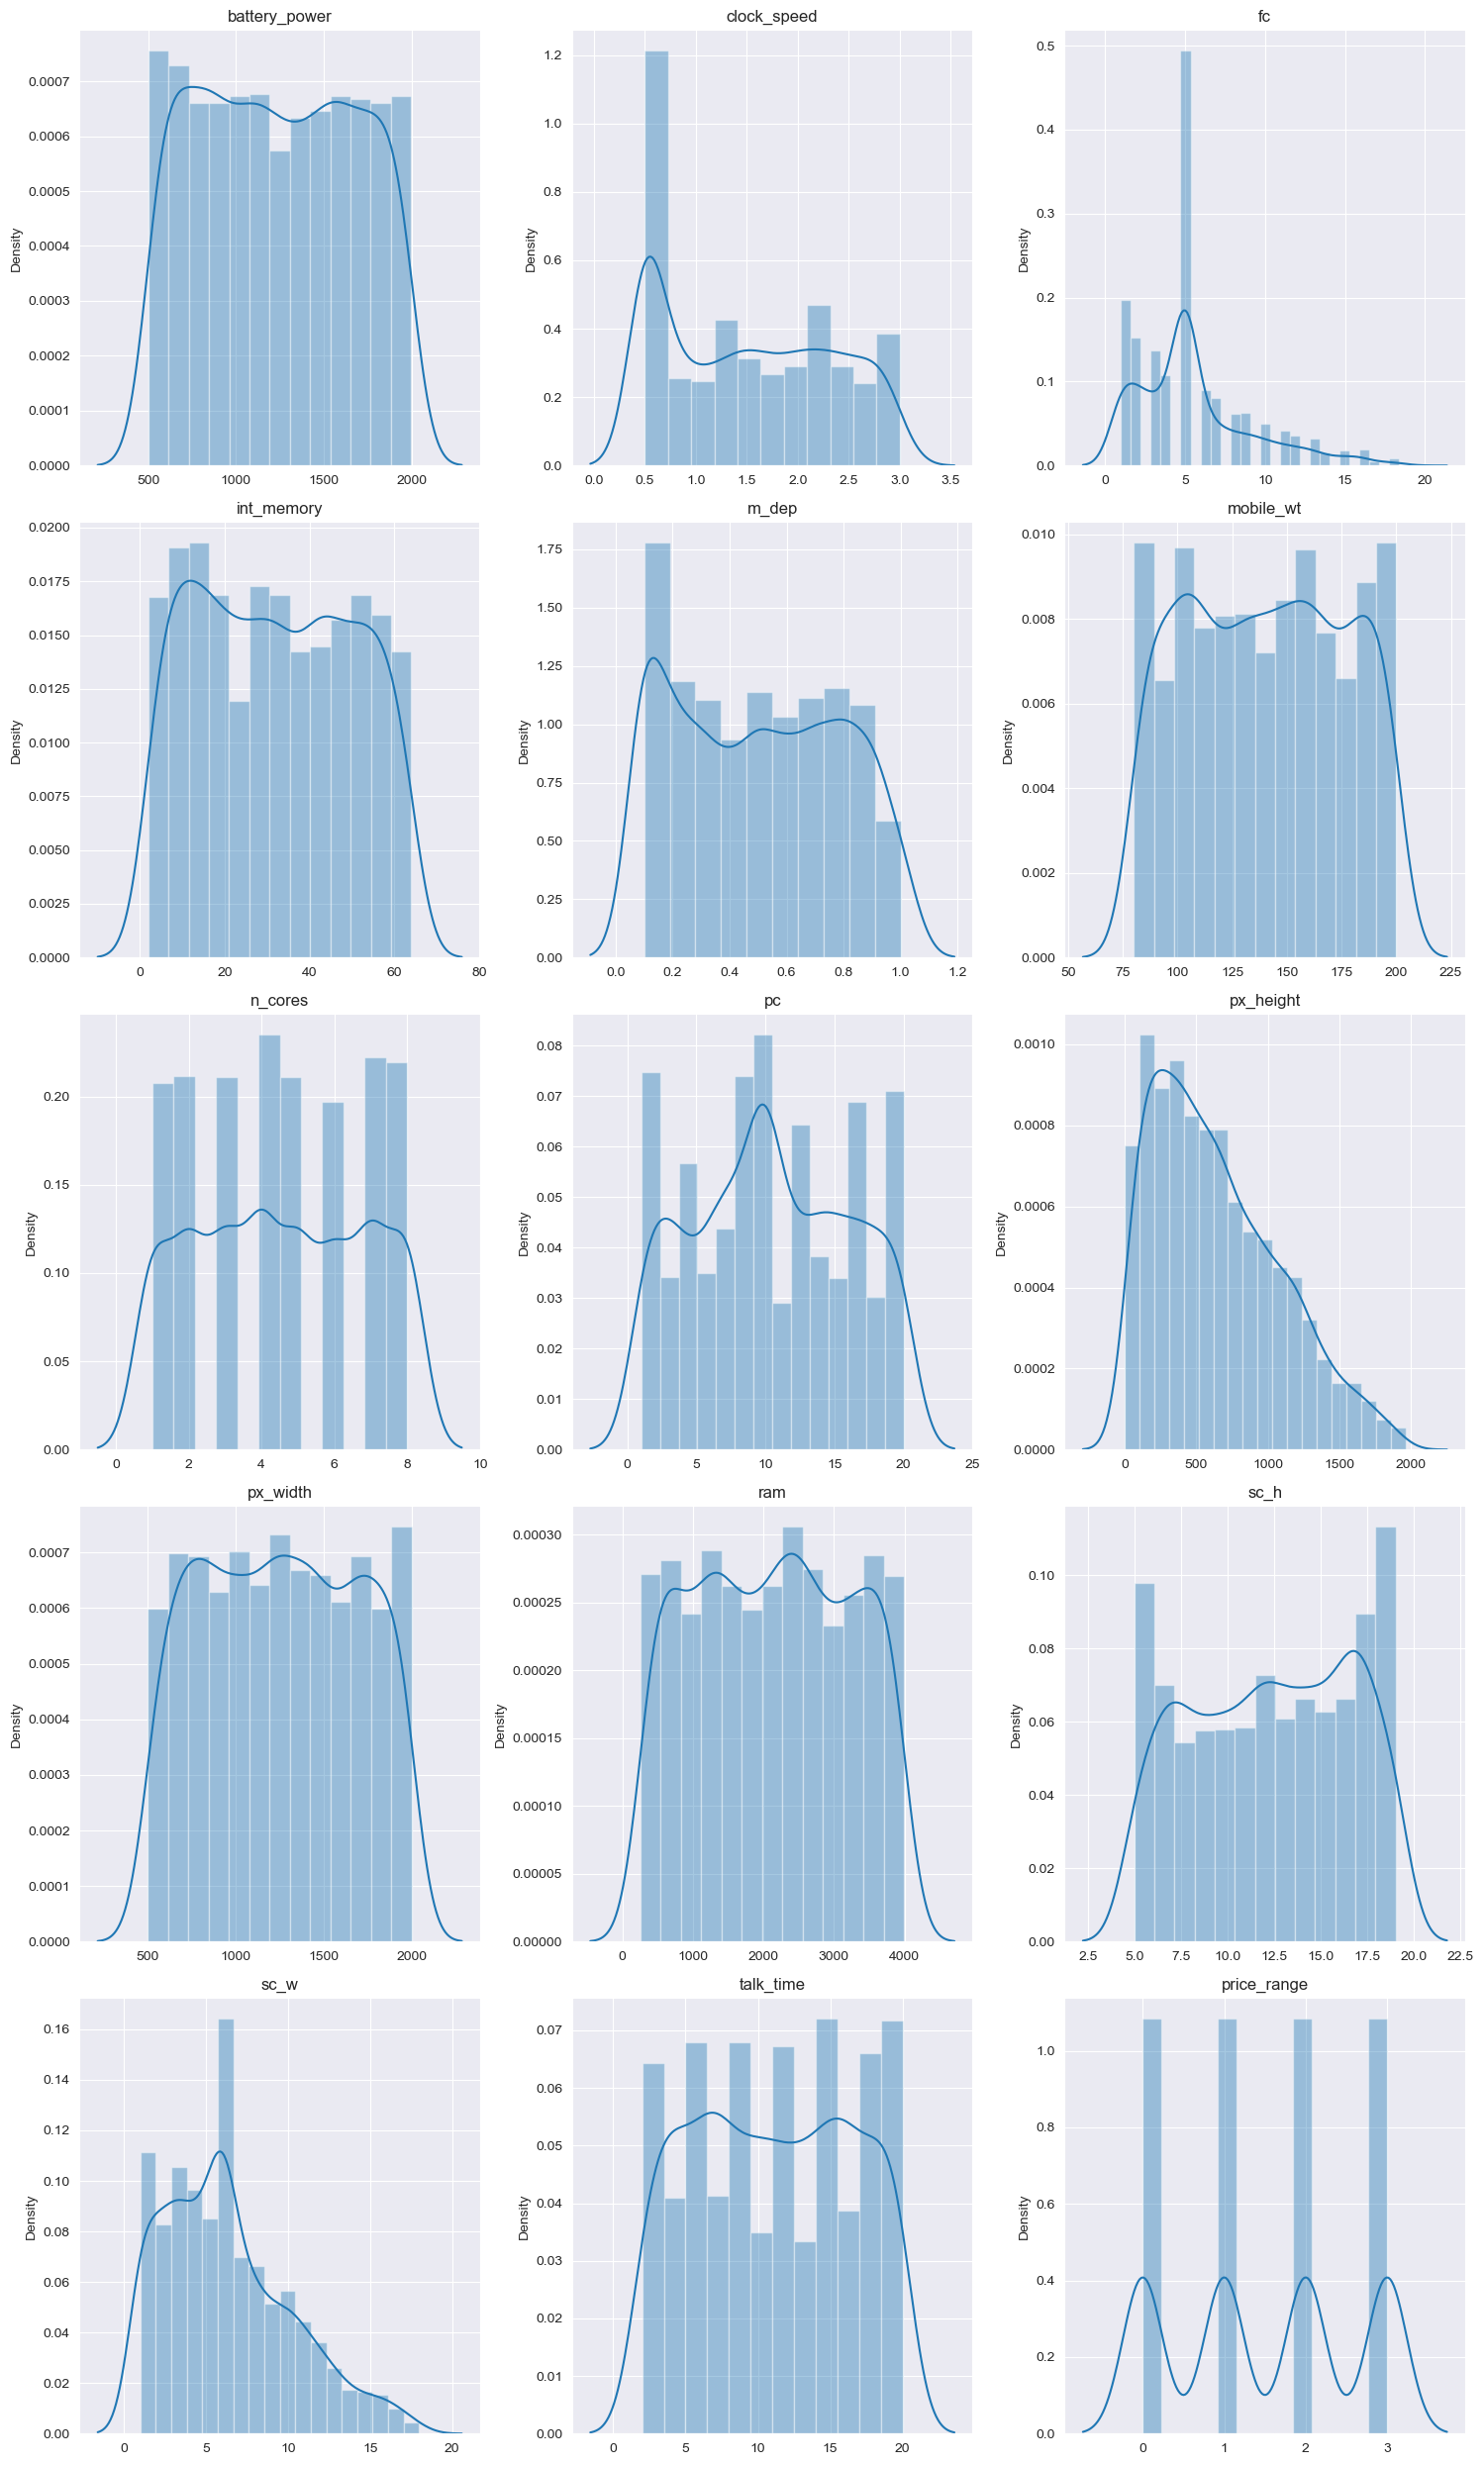

In [15]:
# Determine the number of columns in the DataFrame
num_columns = len(df.columns.values)

# Calculate the number of rows required for subplots
num_rows = (num_columns + 2) // 3  # Add 2 to handle uneven number of columns

# Set up the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Plot boxplots for each column
for i, column in enumerate(df.columns.values):
    sns.distplot(ax=axes[i], a=df[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove empty subplots if present
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


we can say that data is more disperesed in all the features of the dataset. indicates that there are wide range of mobile phones avaialable in the market with significant difference in the features.

### Data Visualization

1. how device pricing is influenced by mobile body and display dimensions?

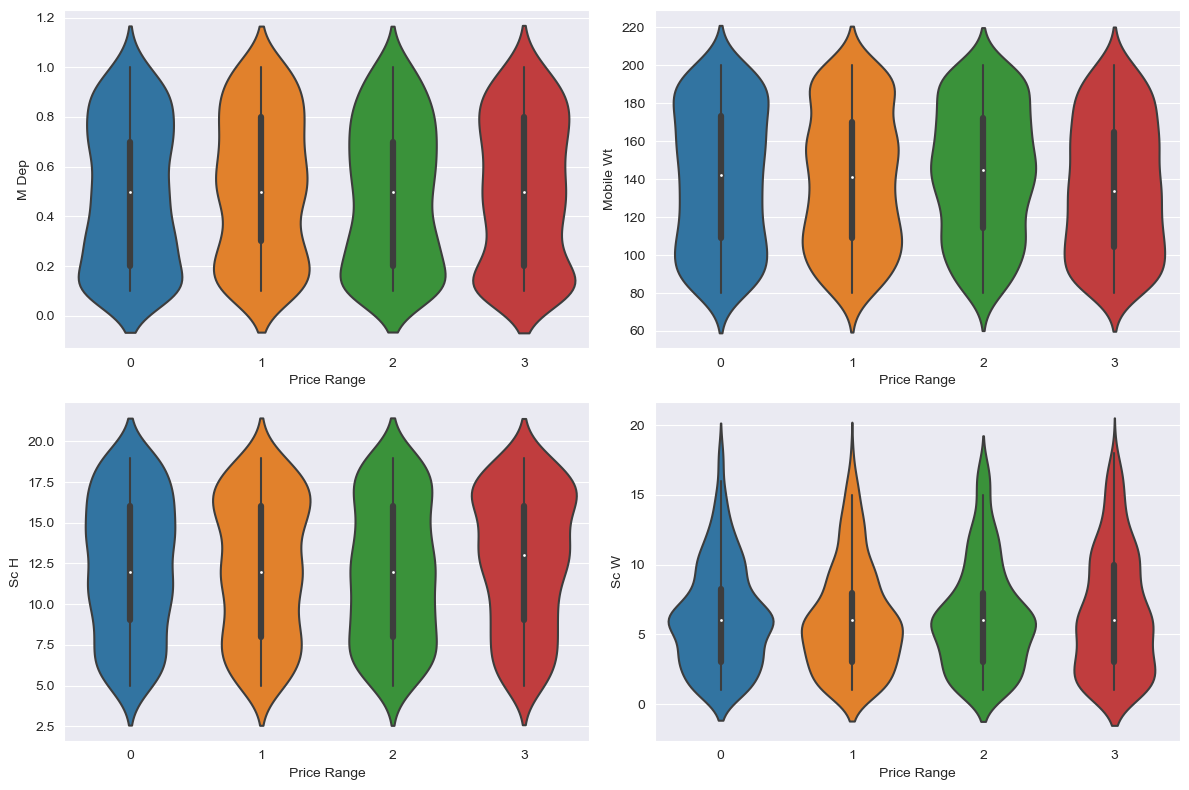

In [16]:
# Define the features for the subplot
features =['m_dep','mobile_wt','sc_h','sc_w']

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the features and create stripplots
for i, feature in enumerate(features):
    # Plot the stripplot on the corresponding axis
    sns.violinplot(x='price_range', y=feature, data=df, ax=axes[i])
    axes[i].set_xlabel('Price Range')
    axes[i].set_ylabel(feature.replace('_', ' ').title())

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


1. M_depp vs price Range : 
   
    Approximation of mpbile depth is 0.2 to 0.8 cm for each category of price range . lower the mobile depth the better for very high cost mobile devices.matplotlib

2. Mobile_wt vs price range :
   
    for very high cost mobile the range of mobile wight should be 100 to 170 gm. we can extend the weight to 180 gm for the models but lower the weight the better for the use.

3. SC_H vs price range :
   
    8 cm to 16 cm is ideal range to build a mobile model..but for the very high cost mobiles tend to have screen height 15 cm to 17 cm.TimeoutError
    
4. Sc_W vs price range :
   
    screen width shouldn't be less than 5 cm ,as for the  very high cost mobiles more screen that is towards 8 cm the better.

    

2. how device pricing is influenced by mobile camera features?

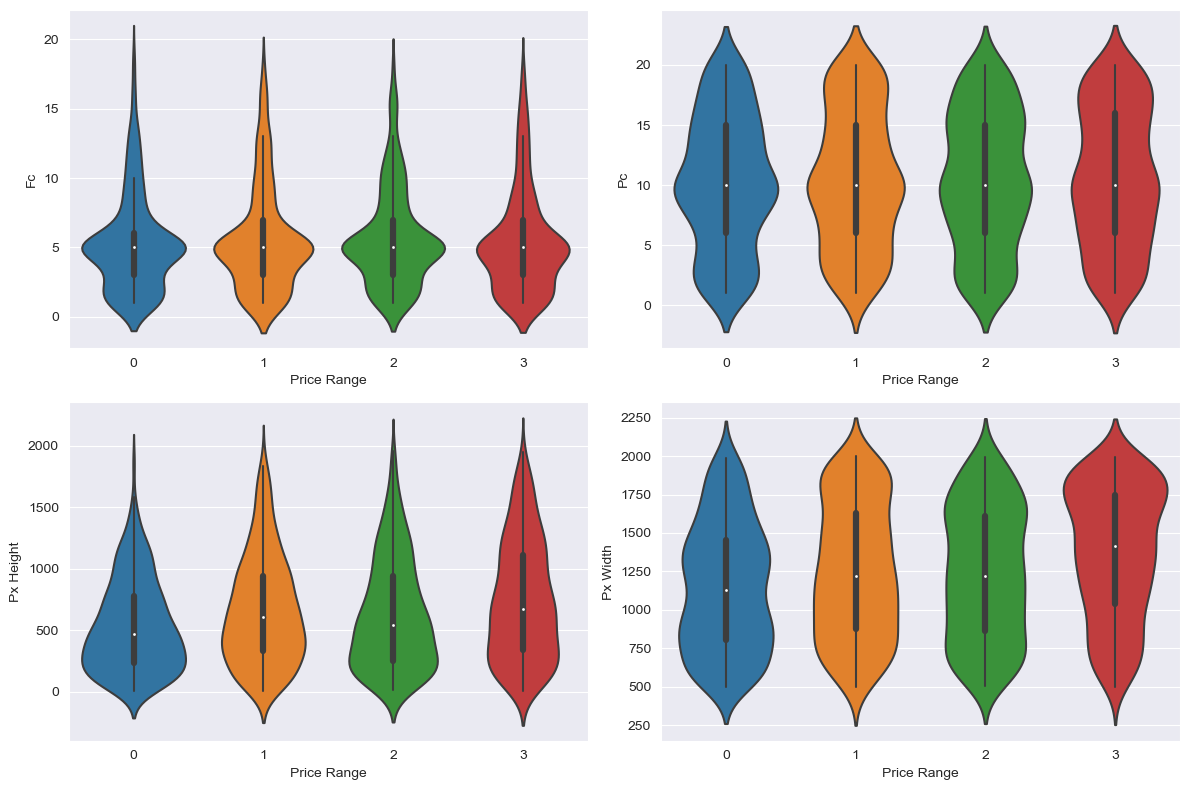

In [17]:
# Define the features for the subplot
features =['fc','pc', 'px_height', 'px_width']

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the features and create stripplots
for i, feature in enumerate(features):
    # Plot the stripplot on the corresponding axis
    sns.violinplot(x='price_range', y=feature, data=df, ax=axes[i])
    axes[i].set_xlabel('Price Range')
    axes[i].set_ylabel(feature.replace('_', ' ').title())

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


1. fc vs price range :

    for any cost mobile models avarage front camera should be around 5 megapixel . for very high cost mobiles minimum should be 5 megapixel.

2. pc vs price range :

    for any cost mobile models avarage primary camera should be around 10 megapixel . for very high cost mobile phones we can see the could rise upto 15 megapixel.

3. Px_height vs price range :

    as we increase the Pixel height resolution of primary camera the price tends to increase moderatelty .if we want to build low , medium or high cost mobile the Pixel height of primary camera should be around 500 pixel .for very high cost mobile it should be around 700 to 800 pixels.

4. Px_width vs price range :

    as we increase the Pixel width resolution of primary camera the price tends to increase moderatelty .if we want to build low , medium or high cost mobile the Pixel Width of primary camera should be around 1250 pixel .for very high cost mobile it should be around 1500 pixel . very high cost mobile tend to have more than 1750 primary camear Pixel width.

3. how device pricing is influenced by mobile features related performacnce?

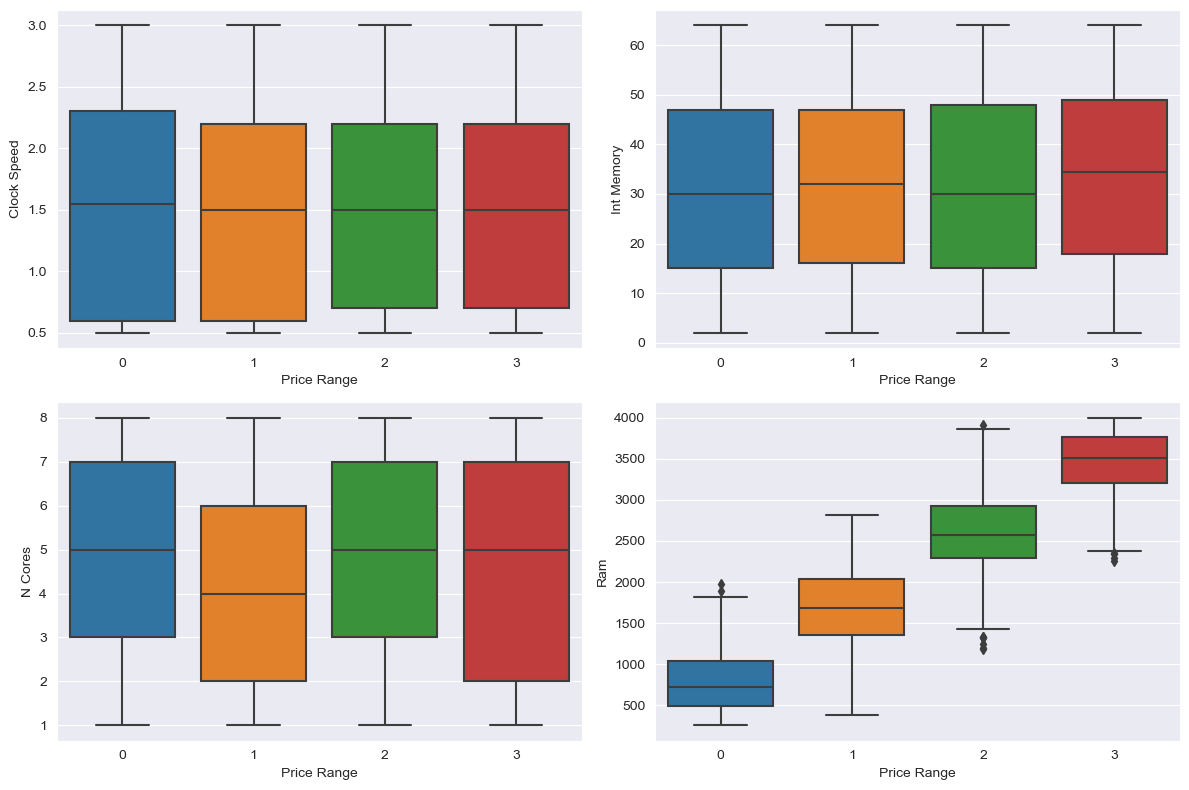

In [29]:
# Define the features for the subplot
features =['clock_speed', 'int_memory' , 'n_cores' , 'ram']

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the features and create stripplots
for i, feature in enumerate(features):
    # Plot the stripplot on the corresponding axis
    sns.boxplot(x='price_range', y=feature, data=df, ax=axes[i])
    axes[i].set_xlabel('Price Range')
    axes[i].set_ylabel(feature.replace('_', ' ').title())

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


1. Clock speed vs price range :

    for any cost mobile models avarage clock speed is 1.5 gigahertz.

2.  Internal memory vs price range :

    for any cost mobile models avarage internal memory is around 30 to 35 gb . for very high cost mobile devices internal memory minimum 32 gb.

3. N_cores vs price range :

    for any cost mobile models average number of cores are either 4 or 5 .

4. RAM vs price range :

    As we increase the ram size the price also increases .for very high cost mobile ram size should be more than 3000 mhz.


4. how device pricing is influenced by battery power and talk time?

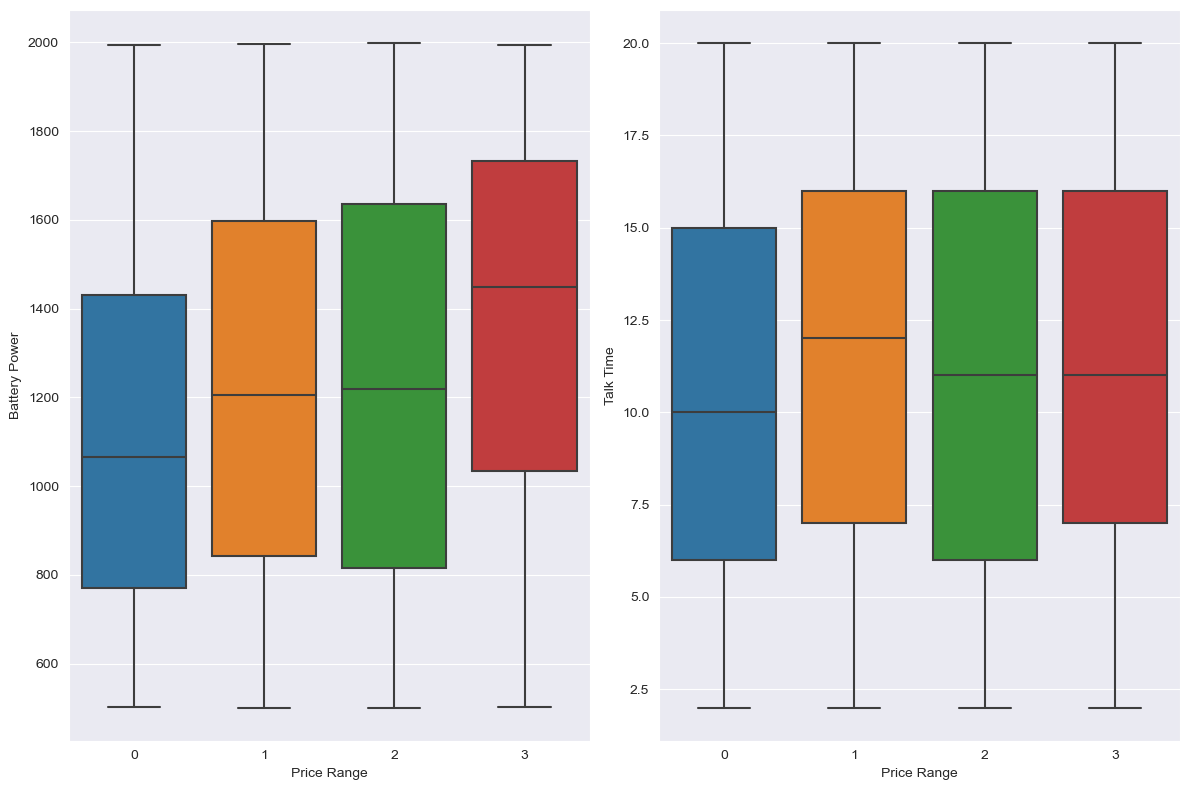

In [34]:
# Define the features for the subplot
features =['battery_power', 'talk_time']

# Create a 2x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the features and create stripplots
for i, feature in enumerate(features):
    # Plot the stripplot on the corresponding axis
    sns.boxplot(x='price_range', y=feature, data=df, ax=axes[i])
    axes[i].set_xlabel('Price Range')
    axes[i].set_ylabel(feature.replace('_', ' ').title())

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


1. Battery Power vs price range:

    for low cost mobile the average battery power is around 1100 mAh . for mediaum and high cost the avearge battery power is around 1200 mAh. wheraeas for very high cost mobile the avrage battery power is more tahn 1400 mAH. so if increase the battery power teh the cost of mobile also increases.

2. Talk Time vs price Range :

    Avarage talk time of any cost mobile is in range between 10 hrs to 12 hrs . could depend on qulity of baatery.
